In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Dense, Flatten,Conv2D , MaxPool2D , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os
import glob
from PIL import Image,ImageOps,ImageEnhance

In [ ]:
labels = ['train/NORMAL', 'train/PNEUMONIA', 'test/NORMAL' , 'test/PNEUMONIA']

for label in labels:
    f = 'drive/My Drive/chest_xray/' + label    
    
    new_d = 224
    for file in os.listdir(f):
        f_img = f+'/'+file
        try:
            img = Image.open(f_img)
           
            img = img.resize((new_d, new_d))
            
            img = ImageOps.equalize(img, mask = None)

            img = ImageOps.autocontrast(img)
             
            #thresh = 127
            #fn = lambda x : 255 if x > thresh else 0
            #img = img.convert('L').point(fn, mode='1')
            #img = img.point(lambda p: p > thresh and 255)
            
            img.save(f_img)
        except IOError:
            pass

In [ ]:
train = 'drive/My Drive/chest_xray/train'
test = 'drive/My Drive/chest_xray/test'

In [ ]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train,
        target_size=(224, 224),
        batch_size=64,
        class_mode='binary',
        shuffle =True)


test_set = test_datagen.flow_from_directory(
        test,
        target_size=(224, 224),
        batch_size=64,
        class_mode='binary',
        shuffle = True)

Found 5218 images belonging to 2 classes.
Found 632 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128))

model.add(Dense(activation = 'sigmoid', units = 1))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics= ['accuracy'])

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
cnn_model = model.fit(training_set,
                         steps_per_epoch = len(training_set)//32,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps =len(test_set)//32 ,
                         verbose=1
                         )

Epoch 1/20
2/2 [==============================] - 0s 143ms/step - loss: 3.8309 - accuracy: 0.6641
Epoch 2/20
2/2 [==============================] - 1s 376ms/step - loss: 2.0765 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 384ms/step - loss: 0.9798 - accuracy: 0.2188
Epoch 4/20
2/2 [==============================] - 1s 403ms/step - loss: 0.5989 - accuracy: 0.7344
Epoch 5/20
2/2 [==============================] - 1s 395ms/step - loss: 0.5961 - accuracy: 0.7188
Epoch 6/20
2/2 [==============================] - 1s 400ms/step - loss: 0.5651 - accuracy: 0.7500
Epoch 7/20
2/2 [==============================] - 1s 386ms/step - loss: 0.5644 - accuracy: 0.7422
Epoch 8/20
2/2 [==============================] - 1s 400ms/step - loss: 0.5657 - accuracy: 0.7422
Epoch 9/20
2/2 [==============================] - 1s 401ms/step - loss: 0.6107 - accuracy: 0.6953
Epoch 10/20
2/2 [==============================] - 1s 389ms/step - loss: 0.5879 - accuracy: 0.7109
Epoch 11/20
2/2 [==

In [ ]:
cnn_model.history

{'accuracy': [0.6640625,
  0.5,
  0.21875,
  0.734375,
  0.71875,
  0.75,
  0.7421875,
  0.7421875,
  0.6953125,
  0.7109375,
  0.7890625,
  0.734375,
  0.7734375,
  0.734375,
  0.7421875,
  0.7265625,
  0.734375,
  0.8359375,
  0.7109375,
  0.8515625],
 'loss': [3.8309452533721924,
  2.076531410217285,
  0.9798172116279602,
  0.5988763570785522,
  0.5960546731948853,
  0.5651456713676453,
  0.5643843412399292,
  0.5657351613044739,
  0.6107392907142639,
  0.5878831744194031,
  0.5114926099777222,
  0.5534865856170654,
  0.49989819526672363,
  0.5415084362030029,
  0.5205965042114258,
  0.5360214710235596,
  0.5239224433898926,
  0.3690528869628906,
  0.5538618564605713,
  0.4352116584777832]}

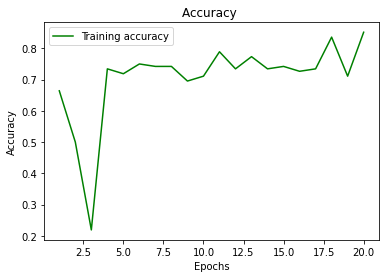

In [ ]:
acc_train = cnn_model.history['accuracy']
epochs = range(1,21)
plt.plot(epochs,acc_train,'g', label='Training accuracy')
plt.title('Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

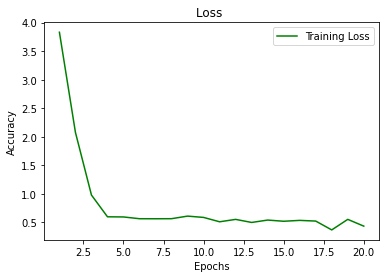

In [ ]:
loss_train = cnn_model.history['loss']
epochs = range(1,21)
plt.plot(epochs,loss_train,'g', label='Training Loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()